In [2]:
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd

sys.path.append(os.path.abspath(".."))

from config import (
    EXPERIMENTS_CF_PATH,
    EXPERIMENTS_CB_PATH,
    EXPERIMENTS_HYBRID_PATH,
)

This notebook is used to visualize the results of the hyperparameter experiments.  

For the CF algorithm:

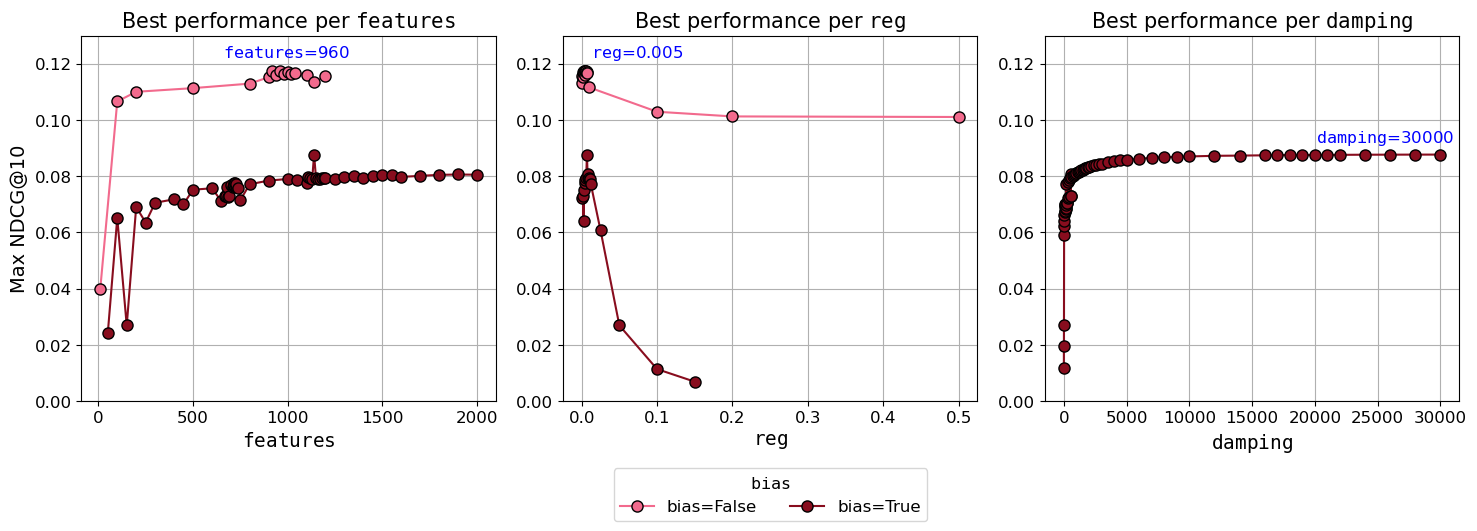

In [8]:
# loading CF experiments results
cf_exp_df = pd.read_csv("../" + EXPERIMENTS_CF_PATH, header=0)

# adding bias column to cf_exp_df
cf_exp_df["bias"] = cf_exp_df["damping"] != "-"

# initializing subplot
nrows, ncols = 1, 3
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5))

groupby_cols = ["features", "reg", "damping"]
color_map = {
    True: "#880d1e",  
    False: "#f26a8d"    
}

for i, col in enumerate(groupby_cols):
    if col == "damping":
        cf_exp_df = cf_exp_df[cf_exp_df["damping"] != "-"]
        cf_exp_df["damping"] = cf_exp_df["damping"].astype(int)
    grouped = cf_exp_df.groupby([col, "bias"])["ndcg@10"].max().reset_index()
   
    for bias in grouped["bias"].unique():
        subset = grouped[grouped["bias"] == bias]
        color = color_map[bias]
        axes[i].plot(subset[col], subset["ndcg@10"], marker='o', label=bias, c=color, markeredgecolor="black", markersize=8)

    col_code = rf"$\mathtt{{{col}}}$"
    axes[i].set_title(f"Best performance per {col_code}", fontsize=15)
    axes[i].set_xlabel(f"{col_code}", fontsize=14)
    axes[i].grid(True)
    axes[i].set_ylim(0, 0.13)
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)   

    # Add annotation for the best point
    best_idx = grouped["ndcg@10"].idxmax()
    best_x = grouped.loc[best_idx, col]
    best_y = grouped.loc[best_idx, "ndcg@10"]
    axes[i].annotate(f"{col_code}={best_x}", 
                     (best_x*0.65, best_y*1.02),  
                     textcoords="offset points", 
                     xytext=(5, 5),
                     ha='left', fontsize=12, color="blue"
                     )

    if i == 0:
        axes[i].set_ylabel("Max NDCG@10", fontsize=14)

# adding legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ['bias=False', 'bias=True'], 
           title=r"$\mathtt{bias}$", 
           loc='lower center', 
           ncol=2, 
           fontsize=12, 
           title_fontsize=12,
           bbox_to_anchor=(0.517, -0.07))

plt.tight_layout(rect=[0, 0.05, 1, 1])  
plt.show()

For the content-based recommender:

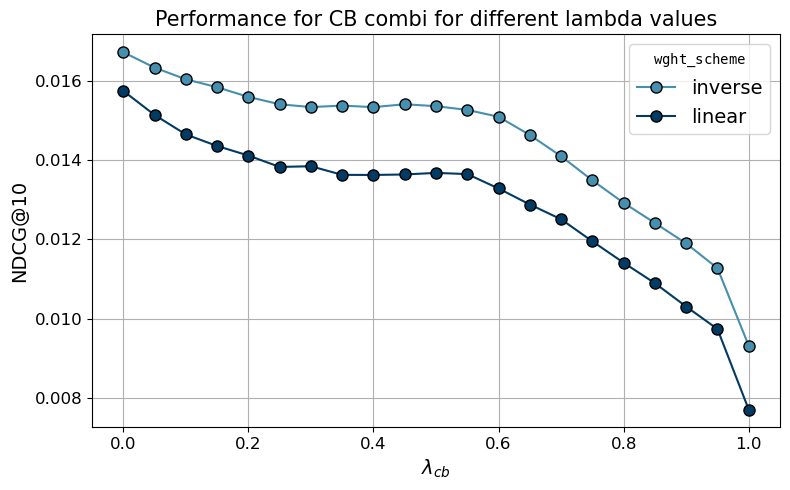

In [4]:
# loading CB combi experiments results
cb_exp_df = pd.read_csv("../" + EXPERIMENTS_CB_PATH, header=0)

# initializing plot and color mapping
plt.figure(figsize=(8, 5))
color_map = {
    "inverse": "#468faf",  
    "linear": "#013a63"    
}

# plotting lines for each wght_scheme
for scheme in cb_exp_df["wght_scheme"].unique():
    subset = cb_exp_df[cb_exp_df["wght_scheme"] == scheme]
    subset = subset.sort_values("lambda")  
    color = color_map[scheme]
    plt.plot(subset["lambda"], subset["ndcg@10"], marker='o', label=scheme, c=color, markeredgecolor="black", markersize=8)

# annotating plot
lambda_cb = r"$\lambda_{cb}$"
plt.xlabel(f"{lambda_cb}", fontsize=14)
plt.ylabel("NDCG@10", fontsize=14)
plt.title("Performance for CB combi for different lambda values", fontsize=15)
legend_title = r"$\mathtt{wght\_scheme}$"
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title=legend_title, fontsize=14)
plt.grid(True)
plt.tight_layout()

plt.show()

For the hybrid recommender: